In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,Chemicals,Coal,Petrol,Vehicles
0,1,3.896,49.780,2.154,4.367
1,2,4.346,47.029,2.250,5.147
2,3,4.318,56.920,2.165,5.418
3,4,4.536,54.336,2.223,4.897
4,5,4.454,50.442,2.190,5.002


In [4]:
df = data.set_index('Unnamed: 0').sort_index()
df.head()

,Chemicals,Coal,Petrol,Vehicles
Unnamed: 0,,,,
1,3.896,49.780,2.154,4.367
2,4.346,47.029,2.250,5.147
3,4.318,56.920,2.165,5.418
4,4.536,54.336,2.223,4.897
5,4.454,50.442,2.190,5.002


In [5]:
df.describe()

,Chemicals,Coal,Petrol,Vehicles
count,252.000000,252.000000,252.000000,252.000000
mean,13.700135,65.669290,10.764841,11.743694
std,6.128043,14.249325,5.113300,5.113334
min,3.896000,11.857000,2.154000,3.537000
25%,8.270750,54.506000,6.618750,7.167250
50%,14.082500,68.201000,10.921500,11.054000
75%,17.328250,76.292750,15.314750,16.108750
max,25.487000,93.078000,19.604000,23.388000


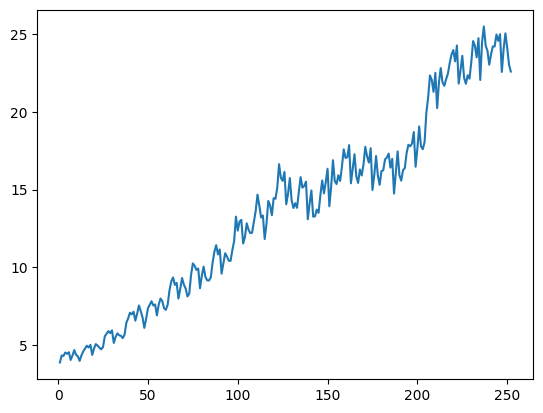

In [6]:
plt.plot(df["Chemicals"])

In [7]:
# импортируем функцию, описывающую тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

In [8]:
# всю теорию, описанную выше, реализуем с помощью statsmodels для проверки
# временного ряда перевозок на стационарность

alpha = 0.05
name = "Chemicals"

# определяем временной ряд отдельной переменной
ts = df["Chemicals"]

print(f'Тест Дики-Фуллера ряда {name} :')
# определяем результат значения теста из библиотеки с учетом
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Chemicals :
Test Statistic                  -0.631257
p-value                          0.863762
#Lags Used                      15.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


А теперь попробуем осуществить дифференцирование. Перед этим опять попробуем декомпозицию ряда.

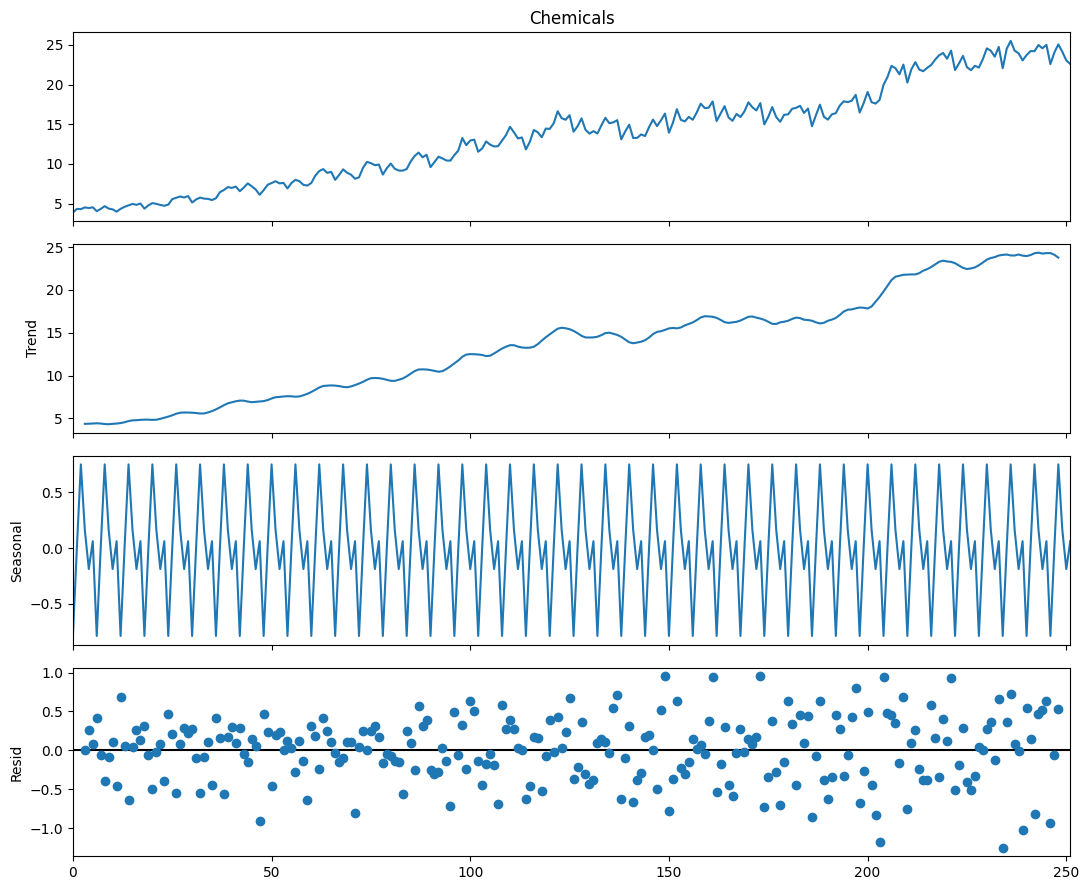

In [9]:
# импортируем функцию seasonal_decompose из statsmodels
# (то есть осуществляем декомпозицию сигнала/временного ряда)
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(data["Chemicals"],
                               period=6)
decompose.plot()
plt.show()

Создадим два временных ряда на основе имеющегося, только без тренда и сезонности.

Удаляем тренд согласно формуле: $y' = y_t - y_{t-1}$;

Удаляем сезонность согласно формуле: $y' = y_t - y_{t-s}$;

In [10]:
nottrend = []
s = 6
notseason = []

# выборка без тренда
for i in range(1, len(df["Chemicals"])):
   nottrend.append(df["Chemicals"][df["Chemicals"].index[i]] - df["Chemicals"][df["Chemicals"].index[i - 1]])

# выборка без сезонности
for i in range(s, len(df["Chemicals"])):
   notseason.append(df["Chemicals"][df["Chemicals"].index[i]] - df["Chemicals"][df["Chemicals"].index[i - s]])

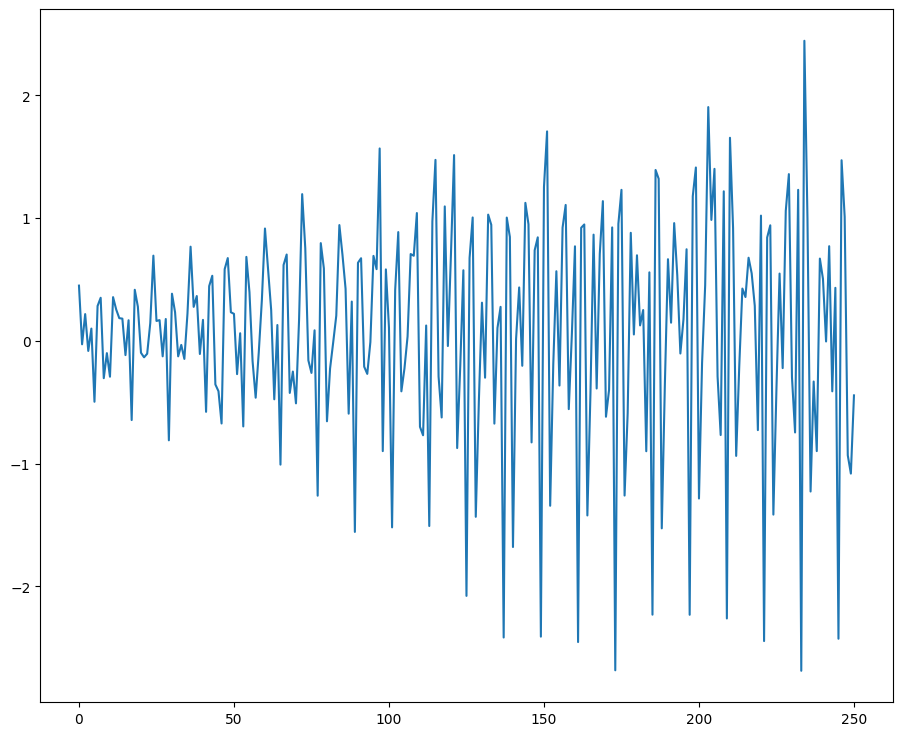

In [11]:
# отрисовываем временной ряд без тренда
plt.plot(nottrend)

Теперь проведем тест Дики-Фуллера на временном ряде без тренда

In [12]:
alpha = 0.05
name = "Chemicals без тренда"

ts = nottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Chemicals без тренда :
Test Statistic                  -3.367313
p-value                          0.012125
#Lags Used                      14.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


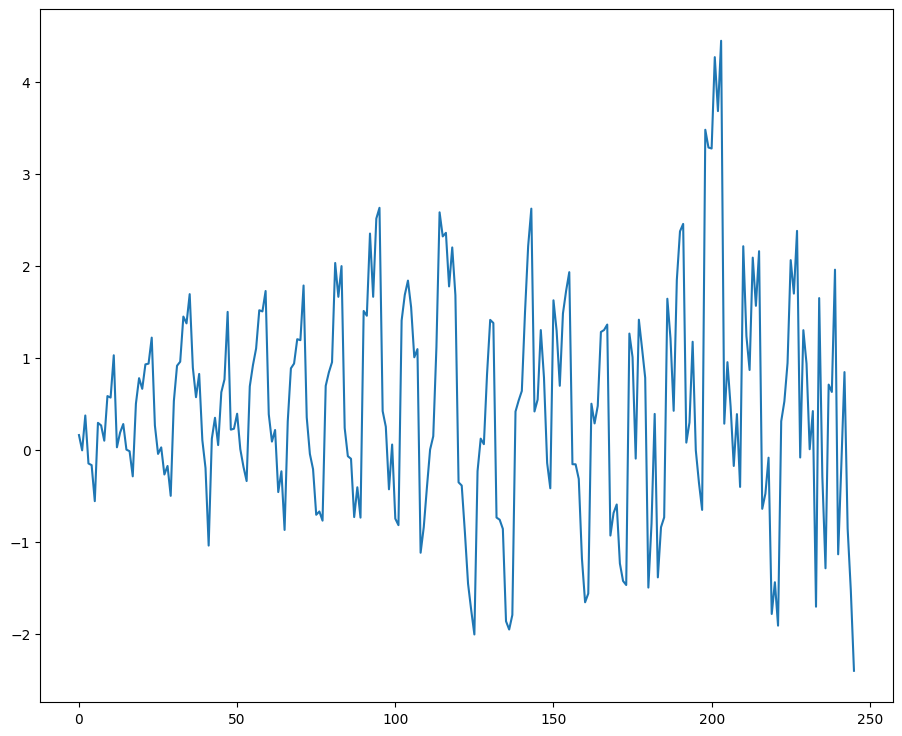

In [13]:
# отрисовываем временной ряд без сезонности
plt.plot(notseason)

Аналогичным образом проведем тест Дики-Фуллера на временном ряде без сезонности

In [14]:
alpha = 0.05
name = "Chemicals без сезона"

ts = notseason

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Chemicals без сезона :
Test Statistic                  -4.320418
p-value                          0.000409
#Lags Used                      15.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Преобразование Бокса-Кокса

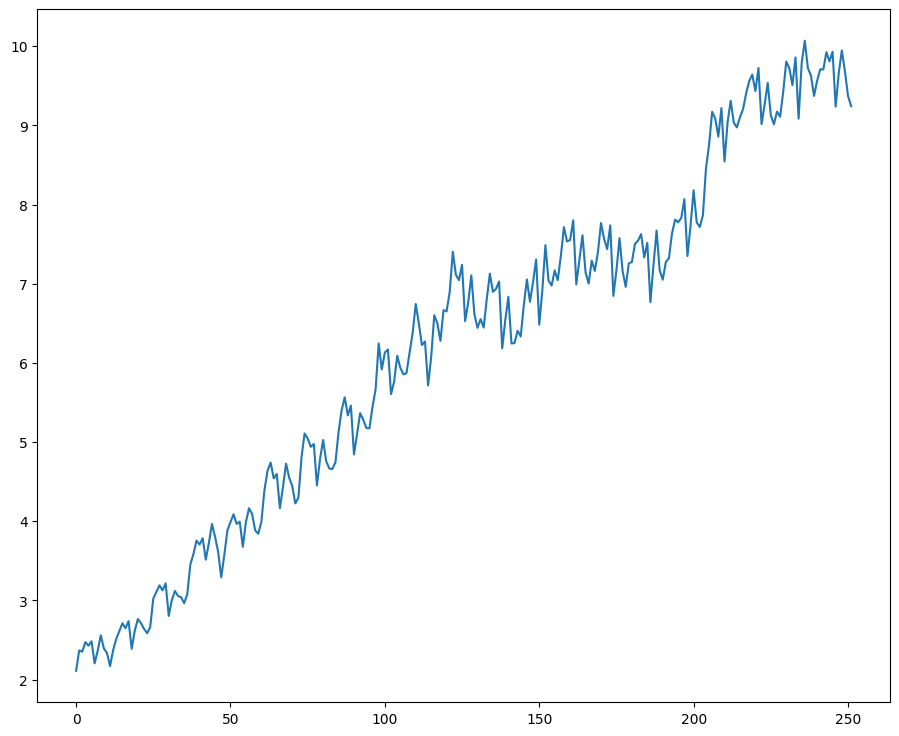

In [15]:
# Преобразование Бокса-Кокса
from scipy.stats import boxcox

# вызываем функцию преобразования, которая выдает преобразованные данные и
# лучший параметр лямбда, который обеспечивает близость к нормальному
# распределению
transformed_data, best_lambda = boxcox(df["Chemicals"])

# а теперь посмотрим на преобразованные данные
plt.plot(transformed_data)

Попробуем теперь из преобразованного временного ряда удалить тренд и
визуализировать его

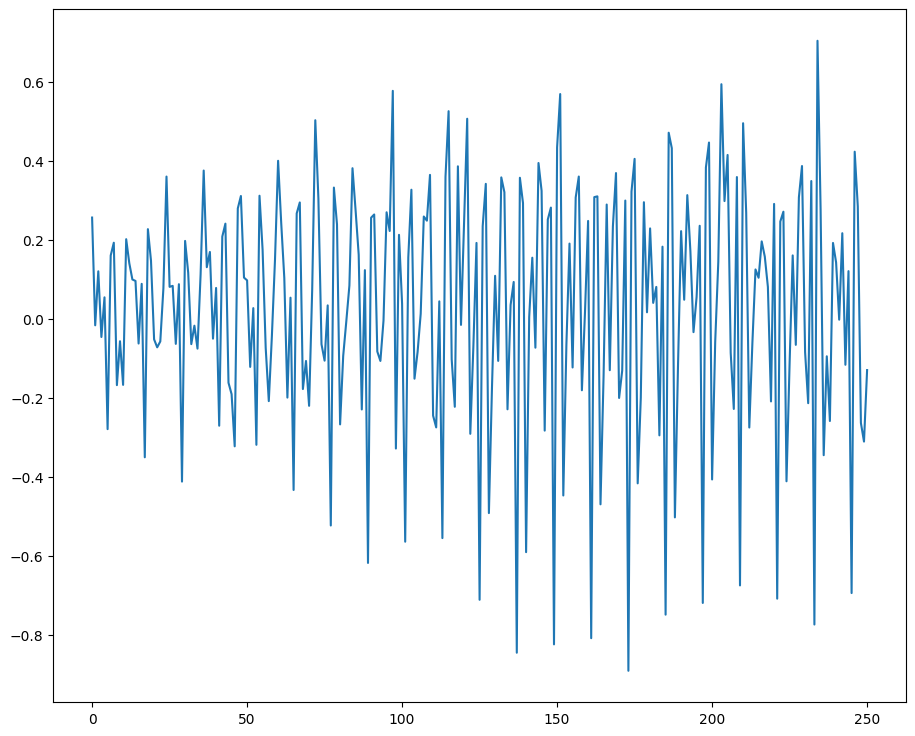

In [16]:
pnottrend = []

for i in range(1, len(transformed_data)):
   pnottrend.append(transformed_data[i] - transformed_data[i-1])


plt.plot(pnottrend)

Удалив тренд из преобразованного Боксом-Коксом ряда, попробуем опять проверить его на стационарность.

In [17]:
alpha = 0.05
name = "Chemicals после Кокса-Бокса"

ts = pnottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Chemicals после Кокса-Бокса :
Test Statistic                  -3.326760
p-value                          0.013724
#Lags Used                      14.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Модели для предсказания значений временного ряда

Первой моделью будет модель AR, или же autoregression - модель, которая использует связь между наблюдением и некоторым количеством предыдущих наблюдений.​
Сделаем случайный ряд и затем поработаем с ним.

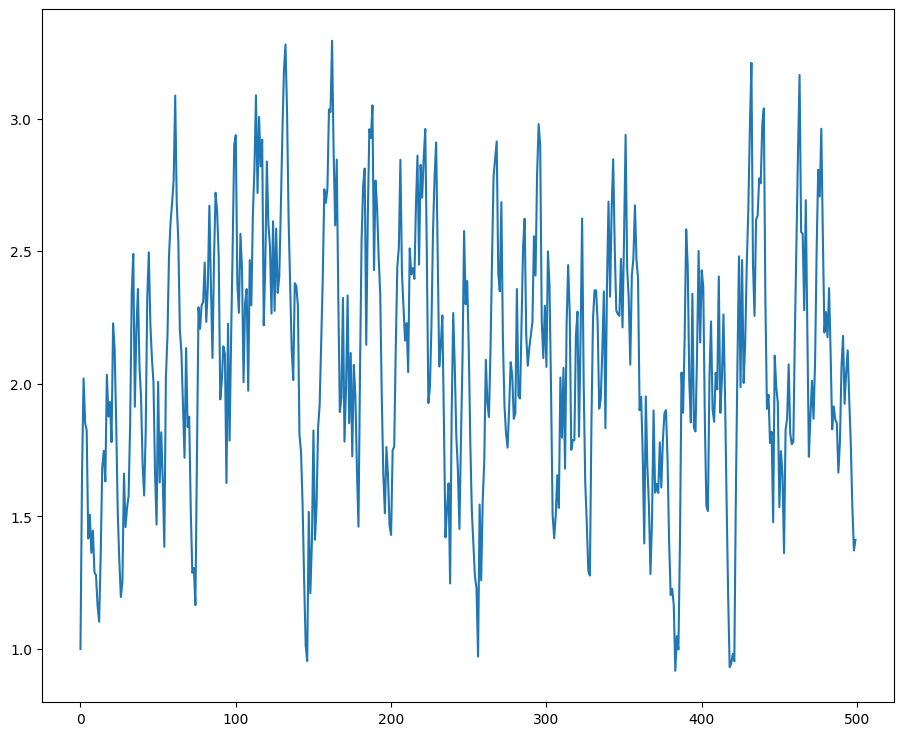

In [18]:
# AR(1)

N = 500

ar1 = [1]

for i in range(1, N):
    ar1.append(0.76 * ar1[i-1] + np.random.random())

plt.plot(ar1)

In [19]:
print(f"standart deviation = {np.std(ar1)}\n mean = {np.mean(ar1)}")

standart deviation = 0.4887366024064416
 mean = 2.090920200100408


А теперь обернем его в датафрейм и посмотрим его обычную и частичную автокорреляцию.

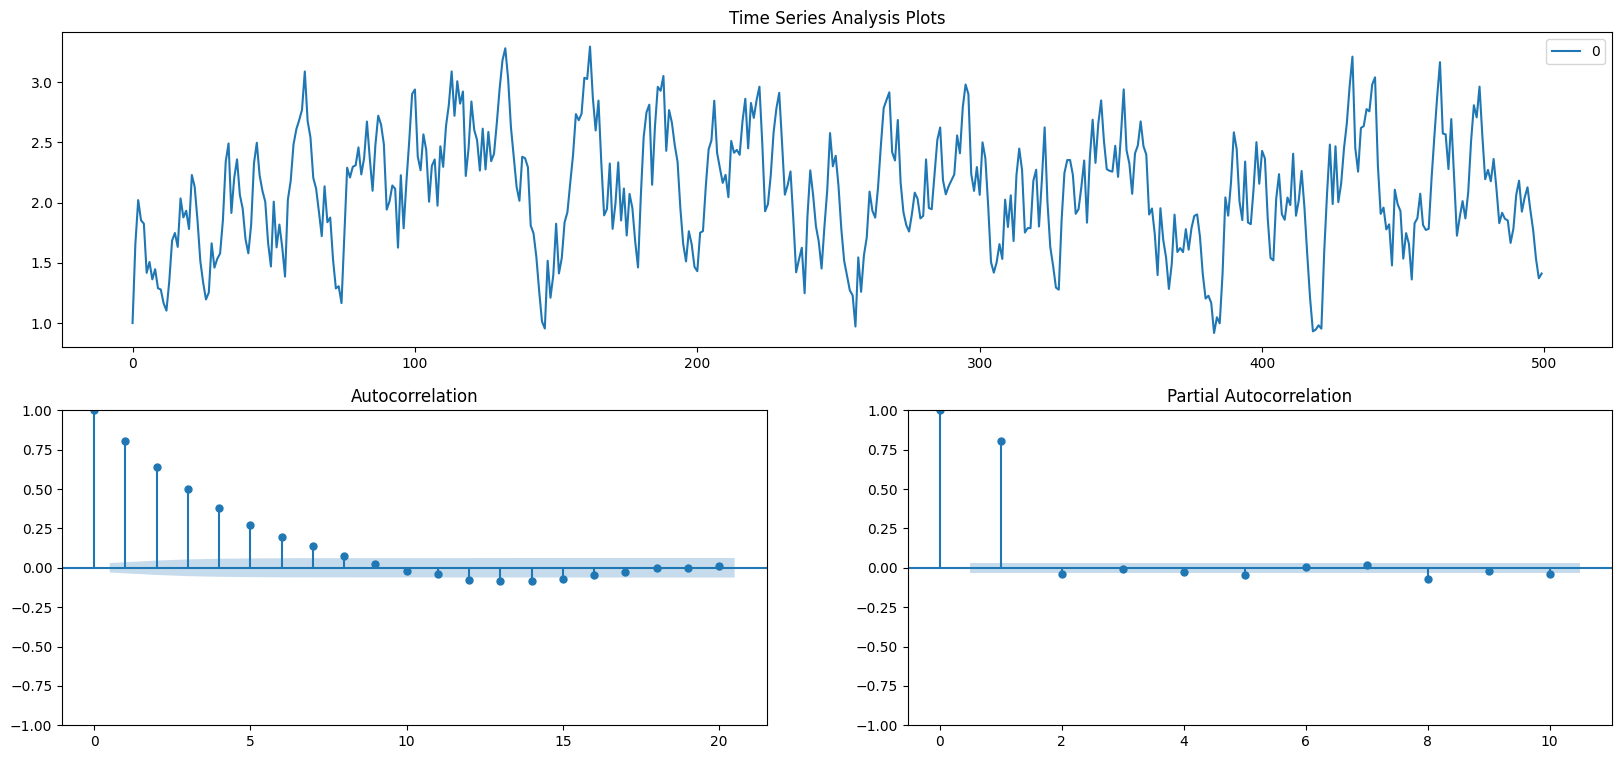

In [20]:
ts = pd.DataFrame(ar1)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

Следаем прогноз с помощью AR модели, предварительно поделив выборки на обучающую, валидационную и тестовую.

In [21]:
df = pd.DataFrame(pd.concat([data["Unnamed: 0"], data["Vehicles"]], axis=1))
df = df.rename(columns={'Unnamed: 0':'t', 'Vehicles':'x'})


df['t'] = df.index.values

ln = len(df)

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

Визуализируем поделенные выборки.

* Обучающая выборка - синим цветом
* Валидационная выборка - оранжевым цветом
* Предсказываемая выборка - зеленым цветом

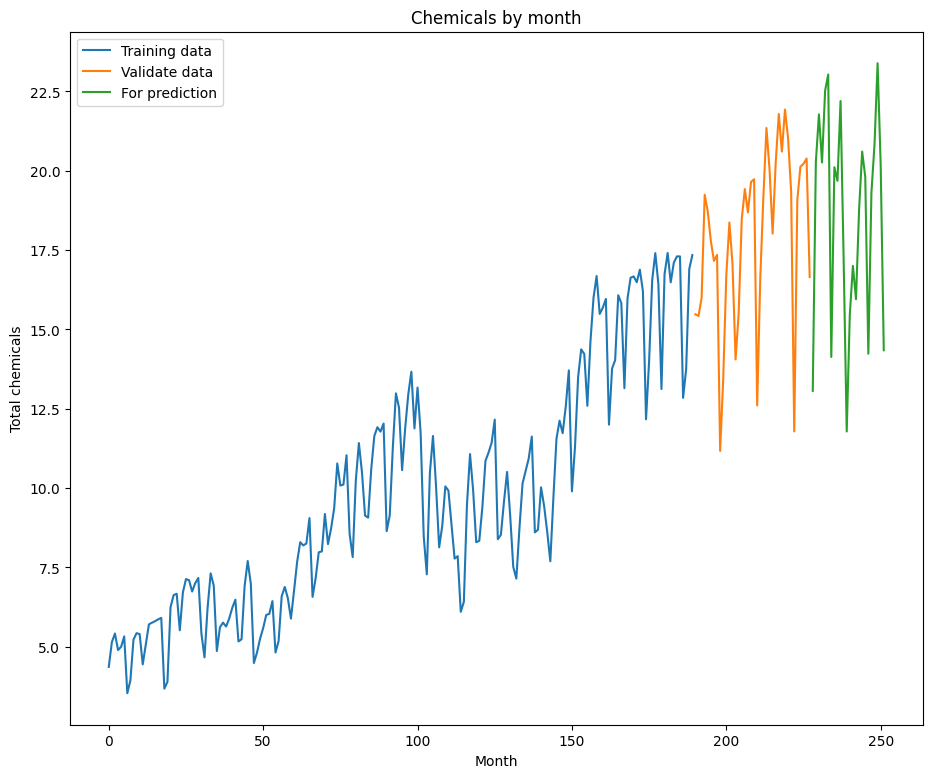

In [22]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.legend()
plt.title('Chemicals by month')
plt.ylabel('Total chemicals')
plt.xlabel('Month')
plt.show()

In [23]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [24]:
# создаем объект модели на основе данных временного ряда с 3 лагами
mod = AutoReg(df.t, 3, old_names=False)
# обучаем
res = mod.fit()

# выводим сводку информации об авторегрессионной модели
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  252
Model:                     AutoReg(3)   Log Likelihood                6521.791
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Mon, 16 Oct 2023   AIC                         -13033.581
Time:                        00:22:30   BIC                         -13015.994
Sample:                             3   HQIC                        -13026.502
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   4.31e-14   1.55e+13      0.000       0.667       0.667
t.L1           1.0000   4.28e-14   2.34e+13      0.000       1.000       1.000
t.L2           0.3333   2.99e-16   1.12e+15      0.0

In [25]:
# опять обучаем модель, но на этот раз указываем тип ковариационной оценки
res = mod.fit(cov_type="HC0")

# смотрим, что изменилось
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  252
Model:                     AutoReg(3)   Log Likelihood                6521.791
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Mon, 16 Oct 2023   AIC                         -13033.581
Time:                        00:23:06   BIC                         -13015.994
Sample:                             3   HQIC                        -13026.502
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   2.69e-14   2.48e+13      0.000       0.667       0.667
t.L1           1.0000   2.66e-14   3.76e+13      0.000       1.000       1.000
t.L2           0.3333   3.37e-16    9.9e+14      0.0

Продолжаем экспериментировать

In [26]:
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  252
Model:                    AutoReg(13)   Log Likelihood                -386.792
Method:               Conditional MLE   S.D. of innovations              1.221
Date:                Mon, 16 Oct 2023   AIC                            803.584
Time:                        00:25:08   BIC                            855.731
Sample:                            13   HQIC                           824.598
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3121      0.217      1.438      0.150      -0.113       0.737
x.L1           0.6371      0.056     11.296      0.000       0.527       0.748
x.L2           0.0072      0.054      0.135      0.8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


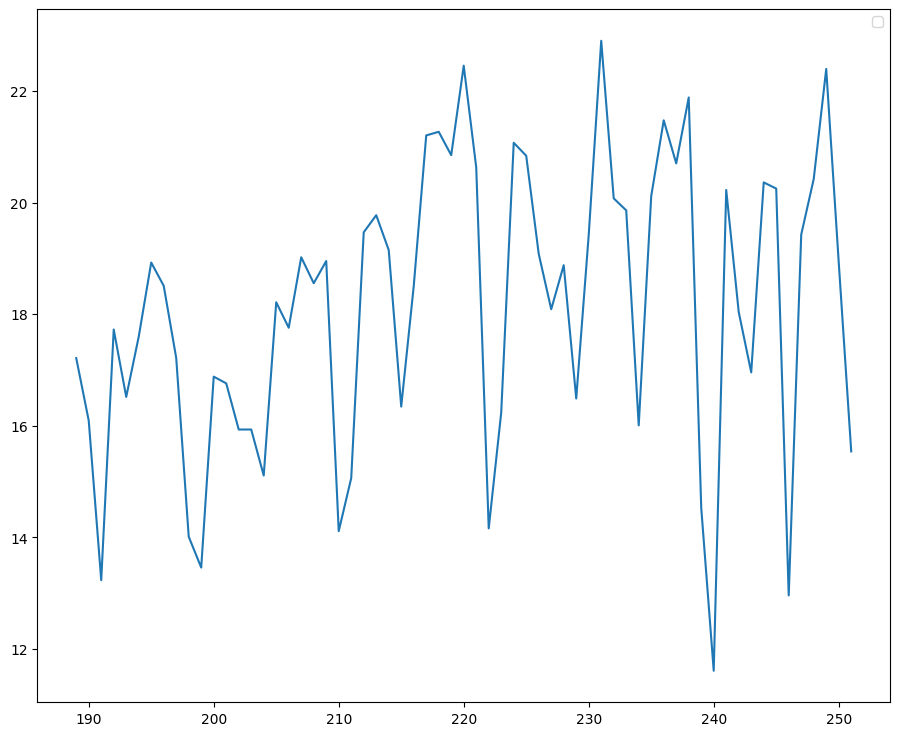

In [27]:
fig = res.plot_predict(train_cutoff)

Формируем предсказанные временные ряды

In [28]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

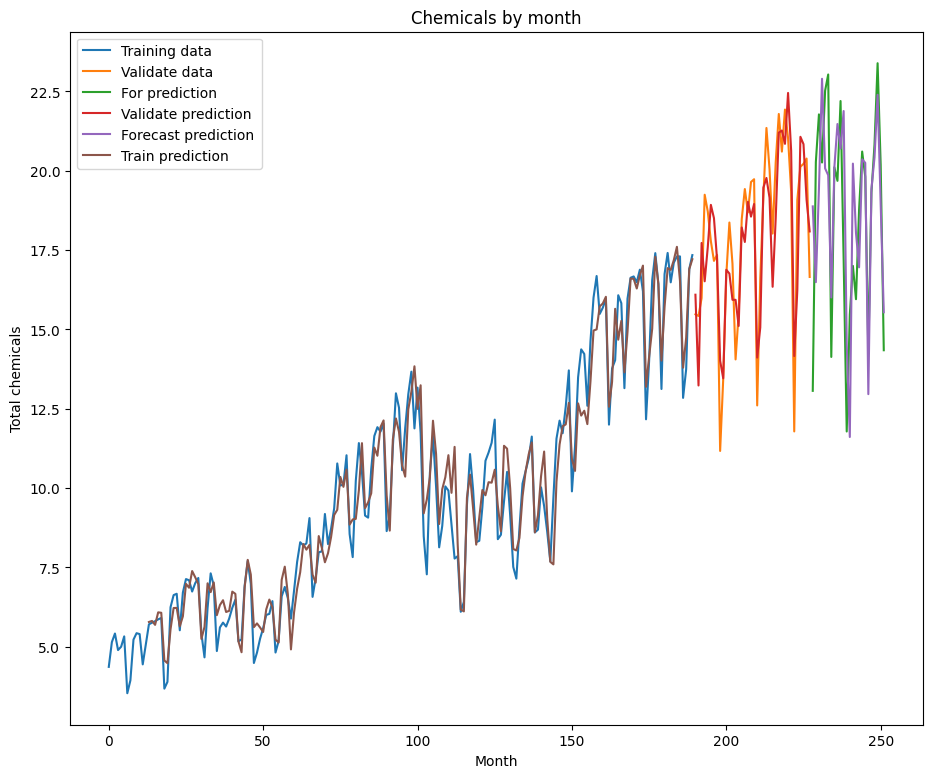

In [29]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Chemicals by month')
plt.ylabel('Total chemicals')
plt.xlabel('Month')
plt.show()

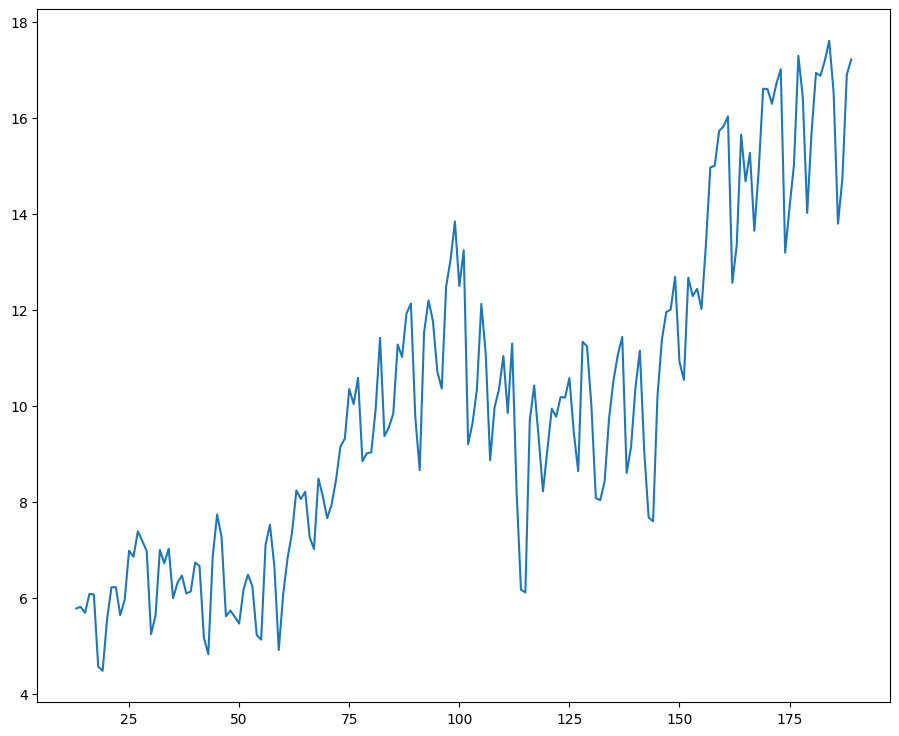

In [30]:
plt.plot(pred)

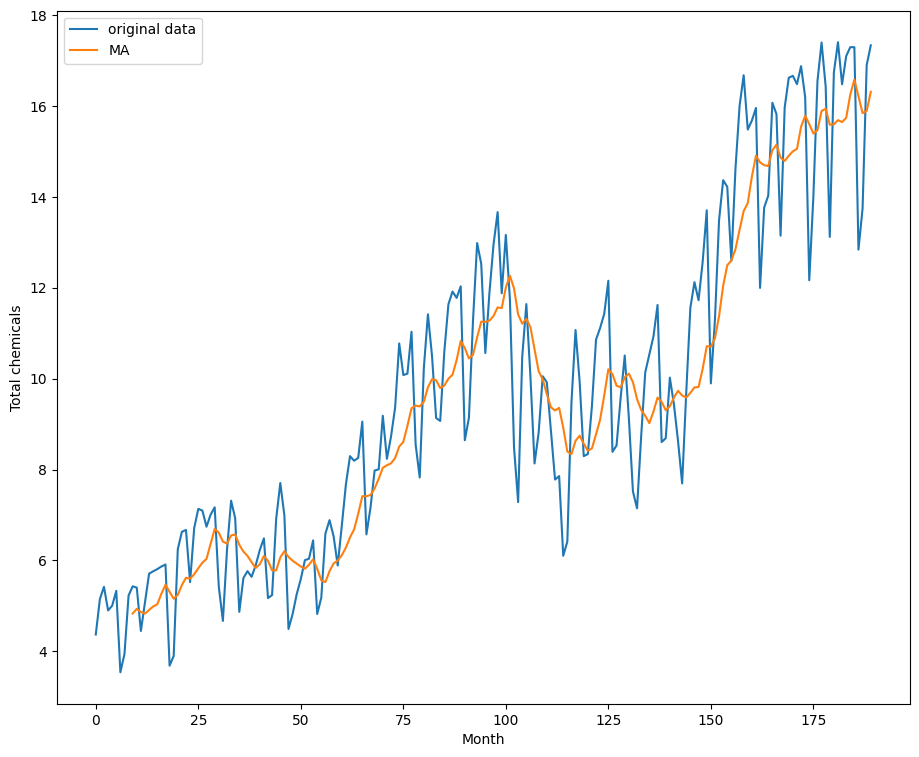

In [31]:
# MA

df['t'] = df.index.values

ln = len(df)

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Total chemicals')
plt.xlabel('Month')
plt.show()

Метрики точности прогноза

In [34]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

Вычислим значения ошибок модели AR, опираясь на предсказанные ею значения forecast.

In [35]:
print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))

RMSE: 2.532560361361803
MAPE: 0.12146853271267981
MAE: 2.0705960870373787
R2:  0.4056863345825903
